<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundemantals with Tensorflow + Milestone Project 3: BitPredict💰📈

⚠ **Note:** This is not financial advice.

Let's write some Tensorflow code to predict the price of Bitcoin.

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-11-09 16:45:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-11-09 16:45:32 (62.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import wiht pandas
import pandas as pd
# Let's read in out Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

In [ ]:
 8*365

2920

We've collected the historical price of Bitcoin for the past 8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots can be thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


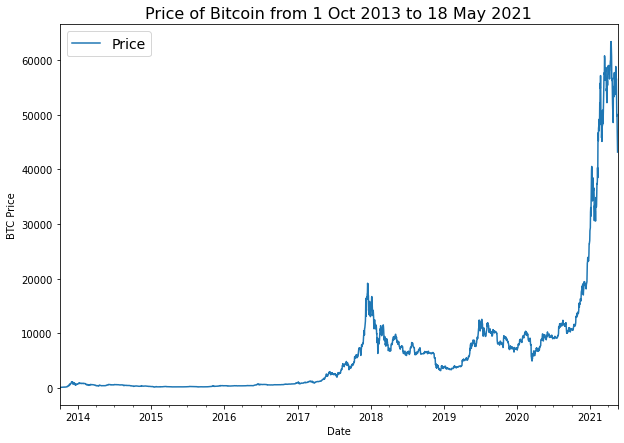

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

# Importing time series data with Python's CSV module

In [ ]:
# Importing and formating historical data with python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

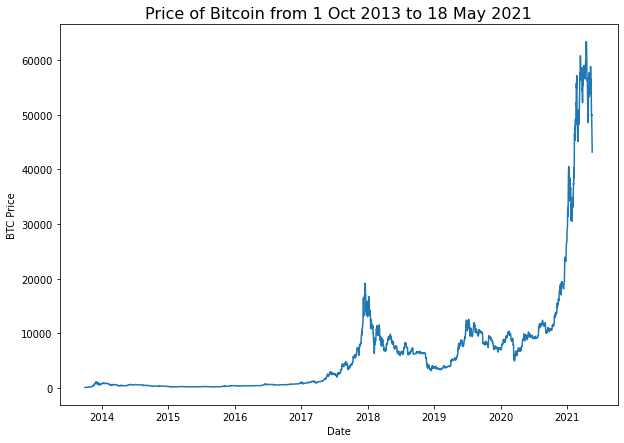

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")

## Format data 1: Create train and test sets kof our time series data

### Creating train and test sets with time series data (the wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

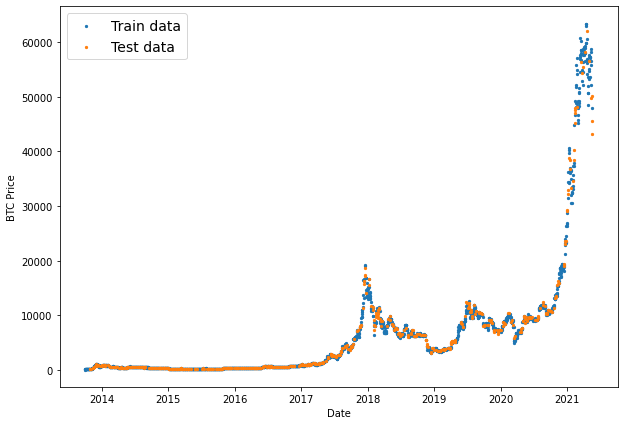

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Create train & test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

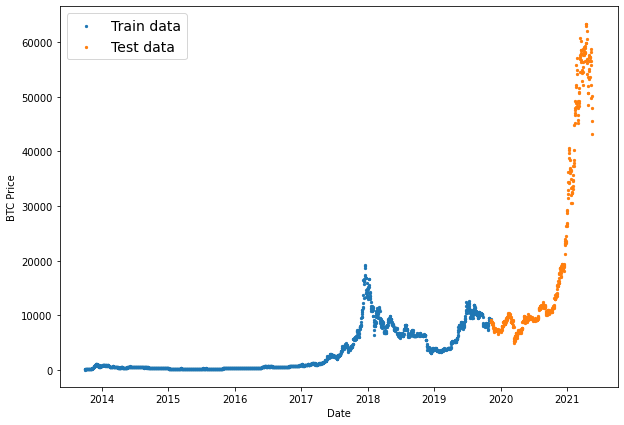

In [ ]:
 # Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters 
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, defailt None
  """
  # Plot the series
  # plt.figure(figsize=(10, 7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

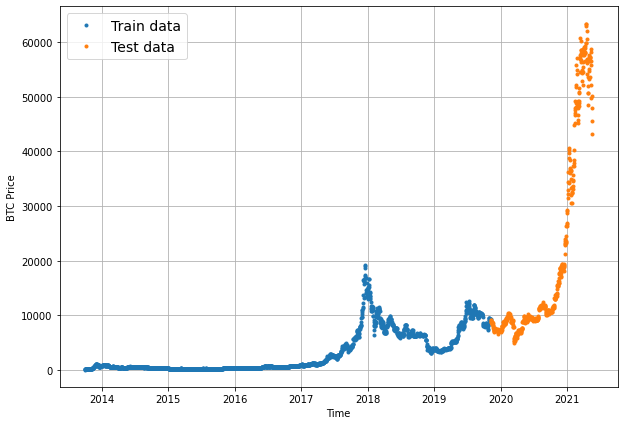

In [ ]:
# Test our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it. let's run a series of modelling experiments and see which performs best.

Term to be familier with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to be using to predict **horizon**

## Model 0: Naive forecast (baseline)

The forumula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

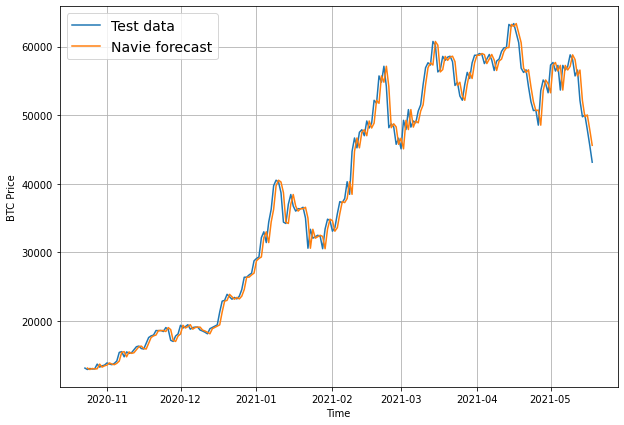

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Navie forecast")

## Evaluating a time series model

Let's look into some evaluating metrics for time series forecasting.

What are we doing?

We're predictiong a number, so that means we have a form of a regression problem.

Because we're working on a regresssion problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetrics) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **Lower is better**, for example,, an MAE of 0 that is better than MAE of 100

The main thing we're evaluating here is: **how do our model's forecasts (y_pred)  compare against the actual (y_true or ground truth values)?**

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implmentation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seeasonality is 1 day (hence the shift kof 1)

  return mae/ mae_naive_no_season


In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evalution metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evalute metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

evalution function ready.. let's see if it works

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## For Data part 2: Windowing our dataset
Why do we window?

We window out time series dataset to turn our data into a supervised learning problem.

```

Windowing for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]


[[window_1],
 [window_2],
 [window_3]]...

In [ ]:
len(y_train)

2229

In [ ]:
# What we want to do with our Bitcoin data
print(f"we want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

we want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup global varibles for window and horizon size
HORIZON = 1 # PREDICT next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoindata to make the prediction

In [ ]:
# create fucntion to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.
  e.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test our the window labelling fucntion
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
 tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

We've got a way  to label our windowed data

However, this only works on a small sccale.

We need a way to do the above across our entire time series

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing. https://www.w3schools.com/python/numpy/numpy_array_indexing.asp

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6]
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Use our `get_labelled_window()` function we created above to turn the window steps into windows with a specified horizon

In [ ]:
import numpy as np
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array in to 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # Create 2D array of window of size window_size
  
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 window/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# view the last 3 window/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 **Note:** There is a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function. https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
prices[-1]

43144.4712908603

In [ ]:
len(prices)

2787

In [ ]:
window_step = np.expand_dims(np.arange(7+1), axis=0)
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
np.expand_dims(np.arange(len(prices)-(7+1-1)), axis=0)

array([[   0,    1,    2, ..., 2777, 2778, 2779]])

In [ ]:
window_step + np.expand_dims(np.arange(len(prices)-(7+1-1)), axis=0).T

array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]])

In [ ]:
2787-2779


8

In [ ]:
window_step + 10

array([[10, 11, 12, 13, 14, 15, 16, 17]])

## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into  train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create trian and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

In [ ]:
np.squeeze(train_labels[:5]).shape

(5,)

In [ ]:
# Check to see if train labels are the same (before and after window splits)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
train_labels

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9335.75240233],
       [9226.48582088],
       [8794.35864452]])

In [ ]:
y_train[WINDOW_SIZE:]

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

 ## Make a modelling checkpoint

 Because our model's prerofmraance wil fluctualte from experiment we are going to make a checkpoint to compare apples to apples

 More specifically we want to compare each of our model's best perforomacne against the other model's best perfomarcne

 for example, if out model perfomrs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the saved on epoch 25

In [ ]:
import os

# Create a fucntion to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=2, # only output a limited amount of text,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Out first deep model is going to be a simple dense model:
* A simple dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no acitivation)
* Adam optimizer and MAE loss function
* Batch size of 128 ( previously we've used 32)
* 100 epochs 

Why these values?

picked from experimentations.

* **Hyperparameters** = values machine leraning practitioner (me) can adjust themselves
* **parameter** = values a model learns on its own 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproductible results as possible
tf.random.set_seed(42)

# 1. Construct Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activatioin is the same as having no acitvation
], name="model_1_dense") # name our model so we can save it

# compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])



Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1014.9537 - mae: 1014.9537 - mse: 3358914.2500 
Epoch 1: val_loss improved from inf to 2279.65283, saving model to model_experiment/model_1_dense
18/18 [==============================] - 4s 61ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 348.8859 - mae: 348.8859 - mse: 600802.6250
Epoch 2: val_loss improved from 2279.65283 to 1005.99933, saving model to model_experiment/model_1_dense
18/18 [==============================] - 1s 46ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4855 - mae: 134.4855 - mse: 70765.6953
Epoch 3: val_loss improved from 1005.99933 to 923.28619, saving model to model_experiment/model_1_dense
18/

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Evalute model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
# Laod in saved best model best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Making forecast with a model (on the test dataset)

To make "forecast" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a  function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the preidctions

In [ ]:
def make_preds(model, input_data):
  """
  Usese model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # resturn 1D array of predcitions

In [ ]:
# Make predictions using model_1 on the test dataset using and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
test_labels.shape

(556, 1)

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

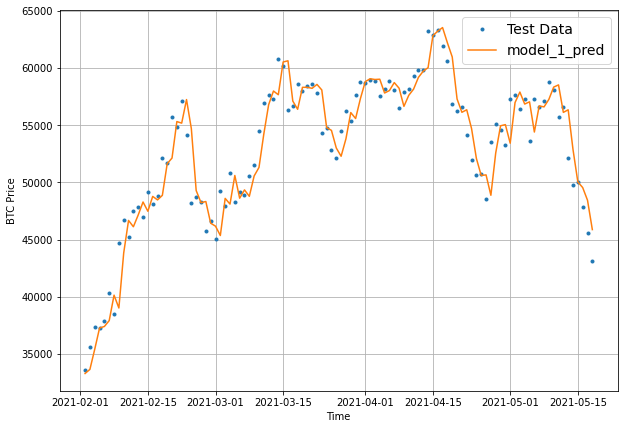

In [ ]:
 # Let's plol our model  1 predictions
 offset = 450
 plt.figure(figsize=(10, 7))
 # account for the test_window offset and index inoto test_laebls to ensure correct ploting
 plot_time_series(timesteps=X_test[-len(test_windows):],
                   values=test_labels[:, 0], 
                   start=offset, 
                   label="Test Data")
 plot_time_series(timesteps=X_test[-len(test_windows):],
                  values=model_1_preds,
                  start=offset,
                  format="-",
                  label="model_1_pred")

# trying to jump from vidoe 26 to cov1d video 33

## Model 4: Conv1D


In [ ]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # USE previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of: "(batch_size, timesteps, input_dim)..
However out data inn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape #returns (WINDOW_SIZE, )

(7,)

In [ ]:
# bEFORE we pass our data to the conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer
print(f"original shaep: {x.shape}") # WINDOW_SIZE
print(f"Expand shape: {expand_dims_layer(x).shape}") # output = 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

original shaep: (7,)
Expand shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
tf.random.set_seed(42)

# Create a Conv1D
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 1494.06836, saving model to model_experiment/model_4_conv1D



Epoch 2: val_loss did not improve from 1494.06836

Epoch 3: val_loss improved from 1494.06836 to 1228.28271, saving model to model_experiment/model_4_conv1D



Epoch 4: val_loss improved from 1228.28271 to 1095.65808, saving model to model_experiment/model_4_conv1D



Epoch 5: val_loss improved from 1095.65808 to 1087.99902, saving model to model_experiment/model_4_conv1D



Epoch 6: val_loss improved from 1087.99902 to 1075.75452, saving model to model_experiment/model_4_conv1D



Epoch 7: val_loss improved from 1075.75452 to 1050.46008, saving model to model_experiment/model_4_conv1D



Epoch 8: val_loss did not improve from 1050.46008

Epoch 9: val_loss did not improve from 1050.46008

Epoch 10: val_loss improved from 1050.46008 to 1007.32935, saving model to model_experiment/model_4_conv1D



Epoch 11: val_loss improved from 1007.32935 to 986.46344, saving model to model_experiment/model_4_conv1D



Epoch 12: val_loss did not improve from 986.46344

Epoch 13: val_loss did not improve from 986.46344

Epoch 14: val_loss improved from 986.46344 to 957.65875, saving model to model_experiment/model_4_conv1D



Epoch 15: val_loss improved from 957.65875 to 951.08667, saving model to model_experiment/model_4_conv1D



Epoch 16: val_loss improved from 951.08667 to 910.61798, saving model to model_experiment/model_4_conv1D



Epoch 17: val_loss did not improve from 910.61798

Epoch 18: val_loss did not improve from 910.61798

Epoch 19: val_loss improved from 910.61798 to 865.16364, saving model to model_experiment/model_4_conv1D



Epoch 20: val_loss improved from 865.16364 to 851.02844, saving model to model_experiment/model_4_conv1D



Epoch 21: val_loss improved from 851.02844 to 823.75818, saving model to model_experiment/model_4_conv1D



Epoch 22: val_loss improved from 823.75818 to 817.55017, saving model to model_experiment/model_4_conv1D



Epoch 23: val_loss improved from 817.55017 to 815.21924, saving model to model_experiment/model_4_conv1D



Epoch 24: val_loss improved from 815.21924 to 811.66492, saving model to model_experiment/model_4_conv1D



Epoch 25: val_loss improved from 811.66492 to 773.26520, saving model to model_experiment/model_4_conv1D



Epoch 26: val_loss improved from 773.26520 to 747.64264, saving model to model_experiment/model_4_conv1D



Epoch 27: val_loss improved from 747.64264 to 736.69550, saving model to model_experiment/model_4_conv1D



Epoch 28: val_loss improved from 736.69550 to 729.32172, saving model to model_experiment/model_4_conv1D



Epoch 29: val_loss improved from 729.32172 to 715.57379, saving model to model_experiment/model_4_conv1D



Epoch 30: val_loss did not improve from 715.57379

Epoch 31: val_loss did not improve from 715.57379

Epoch 32: val_loss improved from 715.57379 to 699.73419, saving model to model_experiment/model_4_conv1D



Epoch 33: val_loss did not improve from 699.73419

Epoch 34: val_loss improved from 699.73419 to 687.41351, saving model to model_experiment/model_4_conv1D



Epoch 35: val_loss improved from 687.41351 to 679.92358, saving model to model_experiment/model_4_conv1D



Epoch 36: val_loss did not improve from 679.92358

Epoch 37: val_loss improved from 679.92358 to 657.95911, saving model to model_experiment/model_4_conv1D



Epoch 38: val_loss improved from 657.95911 to 653.30328, saving model to model_experiment/model_4_conv1D



Epoch 39: val_loss did not improve from 653.30328

Epoch 40: val_loss improved from 653.30328 to 649.88092, saving model to model_experiment/model_4_conv1D



Epoch 41: val_loss improved from 649.88092 to 635.91492, saving model to model_experiment/model_4_conv1D



Epoch 42: val_loss improved from 635.91492 to 633.31470, saving model to model_experiment/model_4_conv1D



Epoch 43: val_loss did not improve from 633.31470

Epoch 44: val_loss improved from 633.31470 to 625.14905, saving model to model_experiment/model_4_conv1D



Epoch 45: val_loss did not improve from 625.14905

Epoch 46: val_loss improved from 625.14905 to 618.13776, saving model to model_experiment/model_4_conv1D



Epoch 47: val_loss did not improve from 618.13776

Epoch 48: val_loss did not improve from 618.13776

Epoch 49: val_loss did not improve from 618.13776

Epoch 50: val_loss did not improve from 618.13776

Epoch 51: val_loss did not improve from 618.13776

Epoch 52: val_loss improved from 618.13776 to 609.05701, saving model to model_experiment/model_4_conv1D



Epoch 53: val_loss did not improve from 609.05701

Epoch 54: val_loss did not improve from 609.05701

Epoch 55: val_loss did not improve from 609.05701

Epoch 56: val_loss did not improve from 609.05701

Epoch 57: val_loss did not improve from 609.05701

Epoch 58: val_loss did not improve from 609.05701

Epoch 59: val_loss improved from 609.05701 to 597.47778, saving model to model_experiment/model_4_conv1D



Epoch 60: val_loss did not improve from 597.47778

Epoch 61: val_loss did not improve from 597.47778

Epoch 62: val_loss did not improve from 597.47778

Epoch 63: val_loss improved from 597.47778 to 596.51587, saving model to model_experiment/model_4_conv1D



Epoch 64: val_loss did not improve from 596.51587

Epoch 65: val_loss improved from 596.51587 to 591.53571, saving model to model_experiment/model_4_conv1D



Epoch 66: val_loss improved from 591.53571 to 588.06128, saving model to model_experiment/model_4_conv1D



Epoch 67: val_loss did not improve from 588.06128

Epoch 68: val_loss did not improve from 588.06128

Epoch 69: val_loss did not improve from 588.06128

Epoch 70: val_loss improved from 588.06128 to 582.77020, saving model to model_experiment/model_4_conv1D



Epoch 71: val_loss did not improve from 582.77020

Epoch 72: val_loss improved from 582.77020 to 581.56598, saving model to model_experiment/model_4_conv1D



Epoch 73: val_loss did not improve from 581.56598

Epoch 74: val_loss did not improve from 581.56598

Epoch 75: val_loss did not improve from 581.56598

Epoch 76: val_loss did not improve from 581.56598

Epoch 77: val_loss improved from 581.56598 to 581.24304, saving model to model_experiment/model_4_conv1D



Epoch 78: val_loss improved from 581.24304 to 578.78662, saving model to model_experiment/model_4_conv1D



Epoch 79: val_loss did not improve from 578.78662

Epoch 80: val_loss did not improve from 578.78662

Epoch 81: val_loss improved from 578.78662 to 575.33197, saving model to model_experiment/model_4_conv1D



Epoch 82: val_loss did not improve from 575.33197

Epoch 83: val_loss did not improve from 575.33197

Epoch 84: val_loss did not improve from 575.33197

Epoch 85: val_loss did not improve from 575.33197

Epoch 86: val_loss did not improve from 575.33197

Epoch 87: val_loss improved from 575.33197 to 573.08057, saving model to model_experiment/model_4_conv1D



Epoch 88: val_loss did not improve from 573.08057

Epoch 89: val_loss did not improve from 573.08057

Epoch 90: val_loss did not improve from 573.08057

Epoch 91: val_loss did not improve from 573.08057

Epoch 92: val_loss did not improve from 573.08057

Epoch 93: val_loss did not improve from 573.08057

Epoch 94: val_loss did not improve from 573.08057

Epoch 95: val_loss improved from 573.08057 to 572.31378, saving model to model_experiment/model_4_conv1D



Epoch 96: val_loss did not improve from 572.31378

Epoch 97: val_loss did not improve from 572.31378

Epoch 98: val_loss did not improve from 572.31378

Epoch 99: val_loss improved from 572.31378 to 570.73877, saving model to model_experiment/model_4_conv1D



Epoch 100: val_loss did not improve from 570.73877


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 615.6102


615.6101684570312

In [ ]:
# Load back in best performing Cov1D
model_4 = tf.keras.models.load_model("/content/model_experiment/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7388


570.73876953125

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8893.429, 8788.89 , 9020.29 , 8796.402, 8743.089, 8764.085,
       8680.323, 8538.849, 8475.116, 8526.651], dtype=float32)>

In [ ]:
# Evalute predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.7388,
 'mse': 1183499.9,
 'rmse': 1087.8878,
 'mape': 2.5461204,
 'mase': 1.00263}

In [ ]:
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data

we use the same data as before

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
tf.random.set_seed(42)

# Lets build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 
Epoch 1: val_loss improved from inf to 9222.65234, saving model to model_experiment/model_5_LSTM
18/18 [==============================] - 3s 113ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 947.0196 
Epoch 2: val_loss improved from 9222.65234 to 1486.05554, saving model to model_experiment/model_5_LSTM
18/18 [==============================] - 2s 114ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4985
Epoch 3: val_loss improved from 1486.05554 to 1298.90845, saving model to model_experiment/model_5_LSTM
18/18 [==============================] - 2s 104ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 192.6114
Epoch 4: val_loss improved from 1298.90845 to 966.64313, saving model to model_experiment/model_5

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiment/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [ ]:
# Make predictions with out LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [ ]:
# Evalaute model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.60297,
 'mse': 1267231.9,
 'rmse': 1125.7139,
 'mape': 2.6717565,
 'mase': 1.0445527}

In [ ]:
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

# Make a multivariate time series dataset

Before we add feature to our time series, what is a feature we can use?

One feature we could add is whether or not Abdur tweeted on that day...

* day 1 - 0 
* day 2 - 1 
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving event

In [ ]:
# Let't make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events to our datasets
block_reward_1 = 50 # January 2009 - this block reward isn't in our dataset ()

36 4:17